In [2]:
from qiskit import QuantumCircuit
import numpy as np

In [24]:
# Implementing the CCCX circuit

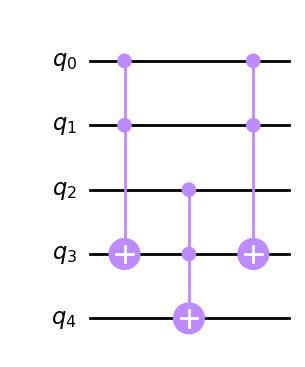

In [33]:
n = 5
qc1 = QuantumCircuit(n)
qc1.ccx(0,1,3)
qc1.ccx(2,3,4)
qc1.ccx(0,1,3)
qc1.draw('mpl')

In [34]:
# q_3 is the auxiliary qubit, which will be initialized to |0>
# q_4 is the target qubit
# If I initialize q_4 to |-> in Grover, the circuit will mark only the |111> state as -|111>

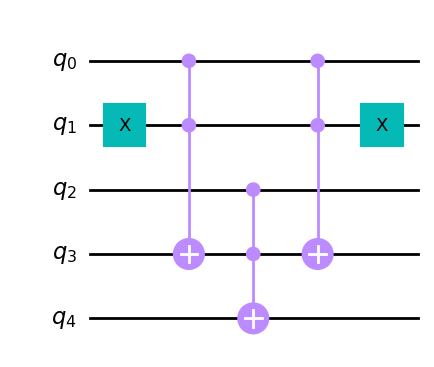

In [35]:
n = 5
qc2 = QuantumCircuit(n)
qc2.x(1)
qc2.ccx(0,1,3)
qc2.ccx(2,3,4)
qc2.ccx(0,1,3)
qc2.x(1)
qc2.draw('mpl')

In [36]:
# This circuit marks the state |101> in the Grover oracle

In [37]:
# Let us implement the Grover circuit

In [38]:
# We want to find the element |111>

In [6]:
# First we define the Phase Oracle

def phase_oracle_1(n,name = 'Uf'):
    qc = QuantumCircuit(n, name=name)
    qc.ccx(0,1,3)
    qc.ccx(2,3,4)
    qc.ccx(0,1,3)
    return qc
# We used the circuit for "qc1" above which marks the state |111>

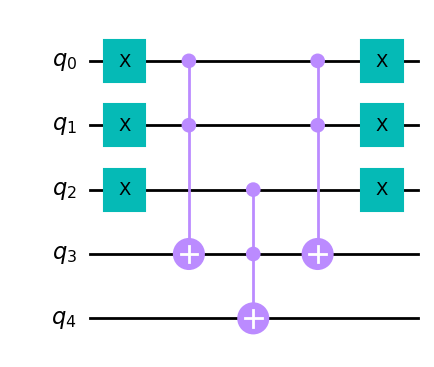

In [51]:
# Next, we want to the Diffusor Operator
# For that, we need a circuit that marks the state |000>, created below:

n = 5
qc3 = QuantumCircuit(n)
for i in range(n-2):
    qc3.x(i)
qc3.ccx(0,1,3)
qc3.ccx(2,3,4)
qc3.ccx(0,1,3)
for i in range(n-2):
    qc3.x(i)
qc3.draw('mpl')

In [7]:
# Now, we define the Diffusor Operator

def diffuser(n, name='V'):
    qc = QuantumCircuit(n, name=name)
    for i in range(n-2): # first layer of Hadamards in diffuser
        qc.h(i)
   
    for i in range(n-2):
        qc.x(i)
    qc.ccx(0,1,3)
    qc.ccx(2,3,4)
    qc.ccx(0,1,3)
    for i in range(n-2):
        qc.x(i)
    
    for i in range(n-2): # second layer of Hadamards in diffuser
        qc.h(i)    
    return qc
# We use the circuit for "qc3" above which marks the state |000>

In [53]:
# Note that the structure of Diffusor Operator always remains same in Grover circuit implementation

r =  2


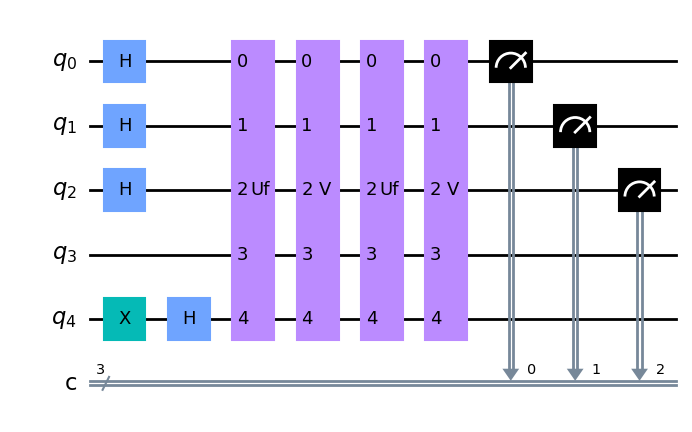

In [8]:
# We now create the Grover circuit

n = 5 # first 3 are working qubits, 4th one is auxiliary (initialized to |0>), 5th one is ancilla
gr = QuantumCircuit(n, n-2)
mu = 1 # number of solutions

r = int(np.floor(np.pi/4*np.sqrt(2**(n-2)/mu))) # Determine r (i.e. number of iterations to make)
# Since no. of working qubits = n-2, here N = 2^(n-2)
print('r = ', r)

# Step 1: apply Hadamard gates on all working qubits
gr.h(range(n-2))   

# Put ancilla qubit in state |->
gr.x(n-1)
gr.h(n-1)
    
# Step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr.append(phase_oracle_1(n), range(n)) # range(n) tells the computer to add the oracle to gr in the same order of qubits, i.e. 0,1,2,3,4
    gr.append(diffuser(n), range(n))
        
# Step 3: measure all qubits
gr.measure(range(n-2), range(n-2))
    
gr.draw('mpl')

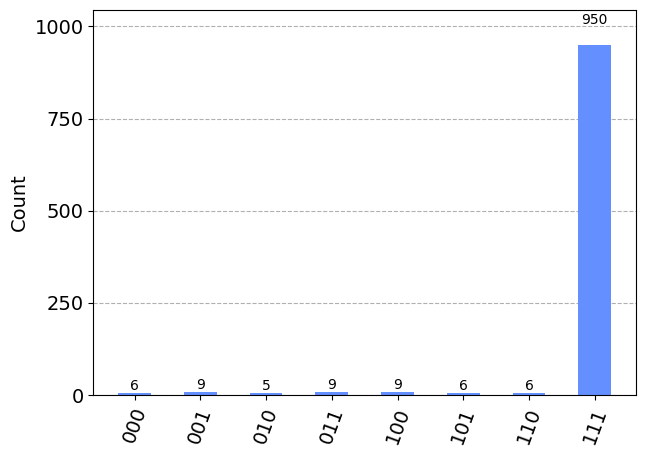

In [9]:
# Let's see the results

from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
job = execute(gr, backend=simulator, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)

In [56]:
# Thus, we found |111> as expected

In [57]:
# Next, we want to find the element |101>

In [58]:
# We define the Phase Oracle

def phase_oracle_2(n,name = 'Uf'): 
    qc = QuantumCircuit(n)
    qc.x(1)
    qc.ccx(0,1,3)
    qc.ccx(2,3,4)
    qc.ccx(0,1,3)
    qc.x(1)
    return qc
# We used the circuit for "qc2" above which marks the state |101>

r =  2


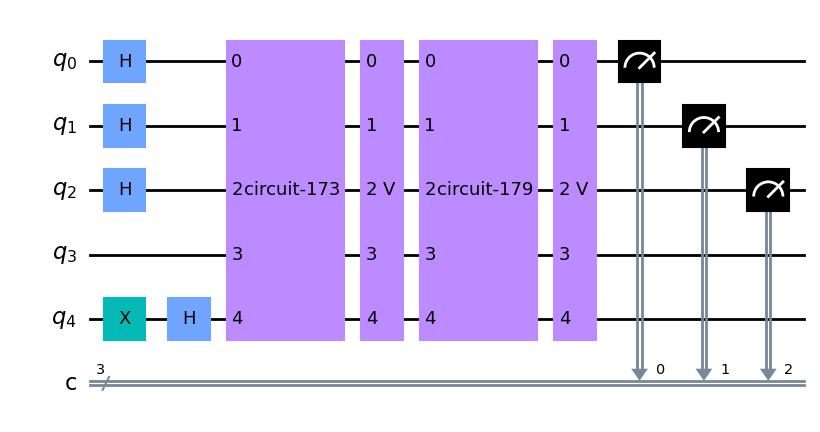

In [59]:
# The diffusor circuit remains the same
# We now create the Grover circuit

n = 5 # first 3 are working qubits, 4th one is auxiliary (initialized to |0>), 5th one is ancilla
gr = QuantumCircuit(n, n-2)
mu = 1 # number of solutions

r = int(np.floor(np.pi/4*np.sqrt(2**(n-2)/mu))) # Determine r (i.e. number of iterations to make)
# Since no. of working qubits = n-2, here N = 2^(n-2)
print('r = ', r)

# Step 1: apply Hadamard gates on all working qubits
gr.h(range(n-2))   

# Put ancilla qubit in state |->
gr.x(n-1)
gr.h(n-1)
    
# Step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr.append(phase_oracle_2(n), range(n)) # range(n) tells the computer to add the oracle to gr in the same order of qubits, i.e. 0,1,2,3,4
    gr.append(diffuser(n), range(n))
        
# Step 3: measure all qubits
gr.measure(range(n-2), range(n-2))
    
gr.draw('mpl')

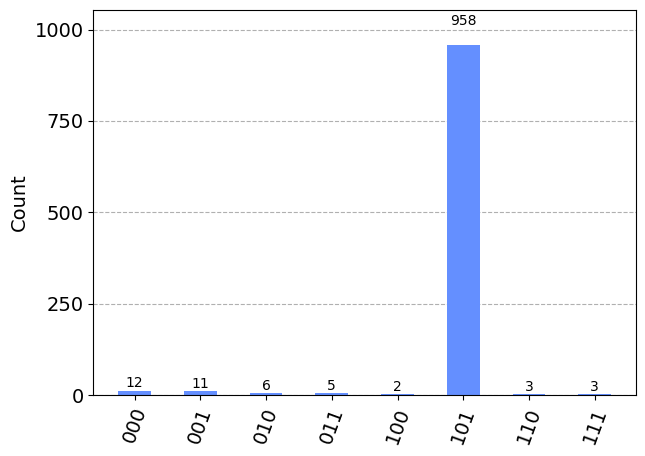

In [60]:
# Let's see the results

from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
job = execute(gr, backend=simulator, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)

In [61]:
# Thus, we found |101> as expected

In [62]:
# Let us run this on a real quantum device

In [63]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

/tmp/ipykernel_82/893222118.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibm_kyoto


In [64]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_circuit = transpile(gr, backend, optimization_level=3)
job = backend.run(transpiled_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


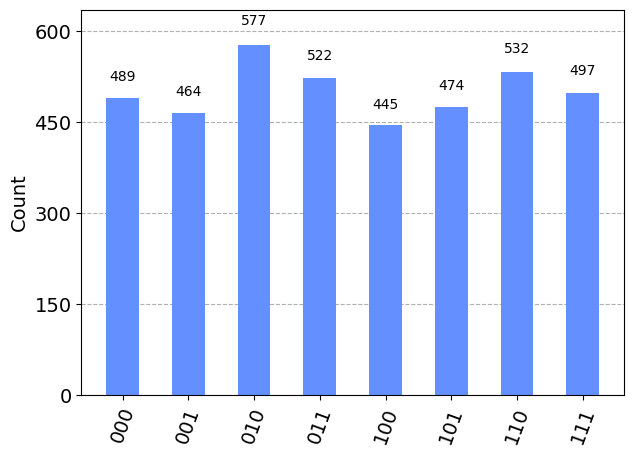

In [65]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

In [1]:
# Nex, we find |1101> using Grover search

In [7]:
# Define phase oracle (marks 1101)

n = 7 # 4 working qubits
def phase_oracle_3(n,name = 'Uf'):
    qc = QuantumCircuit(n, name=name)
    qc.x(1)
    qc.ccx(0,1,4)
    qc.ccx(2,4,5)
    qc.ccx(3,5,6)
    qc.ccx(2,4,5)
    qc.ccx(0,1,4)
    qc.x(1)
    return qc

In [8]:
# Define diffusor circuit (marks 0000)

def diffuser_4q(n, name='V'): # diffusor for 4 working qubits
    qc = QuantumCircuit(n, name=name)
    for i in range(n-3): # first layer of Hadamards in diffuser
        qc.h(i)
        
    for i in range(n-3):
        qc.x(i)
    qc.ccx(0,1,4)
    qc.ccx(2,4,5)
    qc.ccx(3,5,6)
    qc.ccx(2,4,5)
    qc.ccx(0,1,4)
    for i in range(n-3):
        qc.x(i)
    
    for i in range(n-3): # second layer of Hadamards in diffuser
        qc.h(i)    
    return qc

r =  3


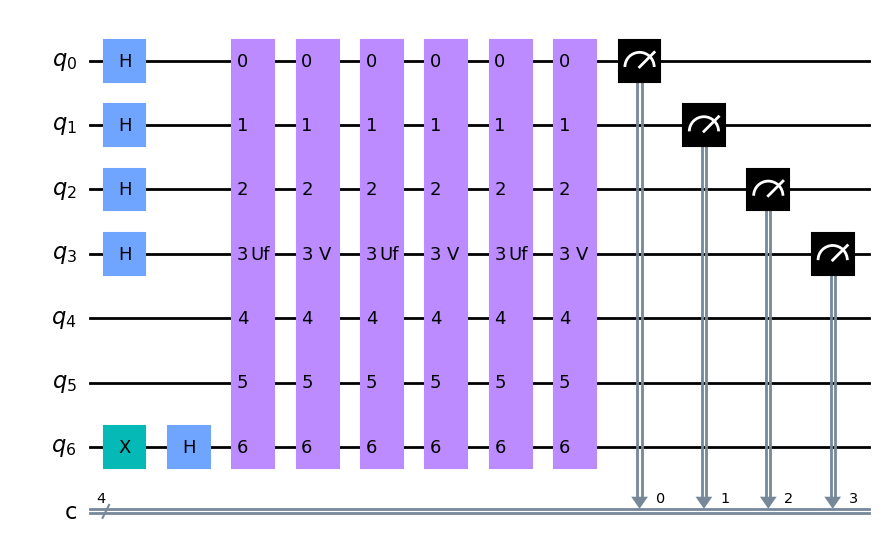

In [9]:
# We now create the Grover circuit

n = 7 # first 4 are working qubits, 5th, 6th - auxiliary (initialized to |0>), 7th - ancilla
gr = QuantumCircuit(n, n-3)
mu = 1 # number of solutions

r = int(np.floor(np.pi/4*np.sqrt(2**(n-3)/mu))) # Determine r (i.e. number of iterations to make)
# Since no. of working qubits = n-3, here N = 2^(n-3)
print('r = ', r)

# Step 1: apply Hadamard gates on all working qubits
gr.h(range(n-3))   

# Put ancilla qubit in state |->
gr.x(n-1)
gr.h(n-1)
    
# Step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr.append(phase_oracle_3(n), range(n)) # range(n) tells the computer to add the oracle to gr in the same order of qubits, i.e. 0,1,2,3,4
    gr.append(diffuser_4q(n), range(n))
        
# Step 3: measure all qubits
gr.measure(range(n-3), range(n-3))
    
gr.draw('mpl')

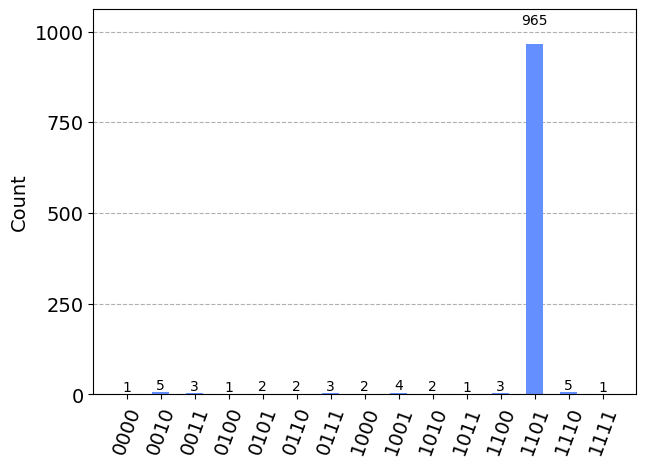

In [10]:
# Let's see the results

from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
job = execute(gr, backend=simulator, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)

In [11]:
# Thus, we found |1101> as expected